# Prediction Delivery Time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import datetime
import pytz
from dateutil import tz
from dateutil import parser



## EDA

Loading data

In [2]:
df_ebay = pd.read_csv('../data/raw/ebayShort.csv', nrows=300000 ,index_col=0)

### Explore Data


As the data is too big, we first working in the shortcut of the total data with 3000000 rows.

In [3]:
# Look at the first 5 row

df_ebay.head(5)

b2c_c2c  seller_id  declared_handling_days      acceptance_scan_timestamp  \
0     B2C      25454                     3.0  2019-03-26 15:11:00.000-07:00   
1     C2C    6727381                     2.0  2018-06-02 12:53:00.000-07:00   
2     B2C      18507                     1.0  2019-01-07 16:22:00.000-05:00   
3     B2C       4677                     1.0  2018-12-17 16:56:00.000-08:00   
4     B2C       4677                     1.0  2018-07-27 16:48:00.000-07:00   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0           0.0                     3   
1                   0           3.0                     3   
2                   0           4.5                     3   
3                   0           0.0                     3   
4                   0           0.0                     3   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                     5       97219     49040           13       27.95   
1                     5  11415-3528     62521            0       20.50   
2                     5       27292     53010            1       19.90   
3                     5       90703     80022            1       35.50   
4                     5       90703     55070            1       25.00   

   quantity               payment_datetime delivery_date  weight  \
0         1  2019-03-24 03:56:49.000-07:00    2019-03-29       5   
1         1  2018-06-01 13:43:54.000-07:00    2018-06-05       0   
2         1  2019-01-06 00:02:00.000-05:00    2019-01-10       9   
3         1  2018-12-16 10:28:28.000-08:00    2018-12-21       8   
4         1  2018-07-26 18:20:02.000-07:00    2018-07-30       3   

   weight_units            package_size  record_number  
0             1                  LETTER              1  
1             1  PACKAGE_THICK_ENVELOPE              2  
2             1  PACKAGE_THICK_ENVELOPE              3  
3             1  PACKAGE_THICK_ENVELOPE              4  
4             1  PACKAGE_THICK_ENVELOPE              5

In [4]:
df_ebay10= df_ebay.head(10)

In [340]:
#Look at 5 random row
df_ebay.sample(5)

b2c_c2c  seller_id  declared_handling_days  \
247428     C2C     545426                     3.0   
99129      B2C       1365                     1.0   
57091      B2C      30484                     1.0   
19793      C2C      53387                     0.0   
110975     C2C    2130678                     2.0   

            acceptance_scan_timestamp  shipment_method_id  shipping_fee  \
247428  2018-08-22 14:58:00.000-04:00                   2         10.21   
99129   2018-03-17 16:43:00.000-05:00                   1          0.00   
57091   2019-07-22 20:55:00.000-05:00                   0          3.99   
19793   2019-01-27 20:07:00.000-07:00                   0          2.70   
110975  2018-08-28 00:05:00.000-04:00                   1          9.85   

        carrier_min_estimate  carrier_max_estimate item_zip buyer_zip  \
247428                     2                     9    06281     25427   
99129                      2                     5    68601     18711   
57091                      3                     5    75205     30213   
19793                      3                     5    85051     64082   
110975                     2                     5    30024     77081   

        category_id  item_price  quantity               payment_datetime  \
247428           29      112.99         1  2018-08-22 10:33:21.000-04:00   
99129             6       74.95         1  2018-03-17 09:28:09.000-05:00   
57091             8       11.50         1  2019-07-22 11:44:01.000-05:00   
19793             3        2.25         1  2019-01-19 10:01:37.000-07:00   
110975            5      312.00         1  2018-08-27 13:02:43.000-04:00   

       delivery_date  weight  weight_units            package_size  \
247428    2018-08-27     144             1  PACKAGE_THICK_ENVELOPE   
99129     2018-03-19       0             1  PACKAGE_THICK_ENVELOPE   
57091     2019-07-24       1             1  PACKAGE_THICK_ENVELOPE   
19793     2019-01-30       3             1  PACKAGE_THICK_ENVELOPE   
110975    2018-08-30      32             1  PACKAGE_THICK_ENVELOPE   

        record_number  
247428         247429  
99129           99130  
57091           57092  
19793           19794  
110975         110976

In [341]:
#check the shape of the dataset
print(f'There are {df_ebay.shape[0]} columns and {df_ebay.shape[1]} rows')

There are 300000 columns and 19 rows


In [342]:
# Get a quick overview of dataset variables
df_ebay.dtypes

b2c_c2c                       object
seller_id                      int64
declared_handling_days       float64
acceptance_scan_timestamp     object
shipment_method_id             int64
shipping_fee                 float64
carrier_min_estimate           int64
carrier_max_estimate           int64
item_zip                      object
buyer_zip                     object
category_id                    int64
item_price                   float64
quantity                       int64
payment_datetime              object
delivery_date                 object
weight                         int64
weight_units                   int64
package_size                  object
record_number                  int64
dtype: object

Show the columns which is not numeric

In [343]:
# 5 rows showing only 'object' columns
df_ebay.select_dtypes('object').head()

b2c_c2c      acceptance_scan_timestamp    item_zip buyer_zip  \
0     B2C  2019-03-26 15:11:00.000-07:00       97219     49040   
1     C2C  2018-06-02 12:53:00.000-07:00  11415-3528     62521   
2     B2C  2019-01-07 16:22:00.000-05:00       27292     53010   
3     B2C  2018-12-17 16:56:00.000-08:00       90703     80022   
4     B2C  2018-07-27 16:48:00.000-07:00       90703     55070   

                payment_datetime delivery_date            package_size  
0  2019-03-24 03:56:49.000-07:00    2019-03-29                  LETTER  
1  2018-06-01 13:43:54.000-07:00    2018-06-05  PACKAGE_THICK_ENVELOPE  
2  2019-01-06 00:02:00.000-05:00    2019-01-10  PACKAGE_THICK_ENVELOPE  
3  2018-12-16 10:28:28.000-08:00    2018-12-21  PACKAGE_THICK_ENVELOPE  
4  2018-07-26 18:20:02.000-07:00    2018-07-30  PACKAGE_THICK_ENVELOPE

### Data cleanding

First let do some common checking in the dataset.
 -  Null value
 -  Duplicate row

#### Check null and duplicate

In [344]:
# checking duplicate rows
df_ebay.duplicated().any()

False

There are no duplicate row in the database

In [345]:
#Checking null
df_ebay.isna().sum()

b2c_c2c                          0
seller_id                        0
declared_handling_days       14348
acceptance_scan_timestamp        0
shipment_method_id               0
shipping_fee                     0
carrier_min_estimate             0
carrier_max_estimate             0
item_zip                         0
buyer_zip                        0
category_id                      0
item_price                       0
quantity                         0
payment_datetime                 0
delivery_date                    0
weight                           0
weight_units                     0
package_size                     0
record_number                    0
dtype: int64

There are missing values in the `declared_handling_day` column

In [346]:
df_null=df_ebay[df_ebay.isna().any(axis=1)]
df_null.head()


b2c_c2c  seller_id  declared_handling_days      acceptance_scan_timestamp  \
111     B2C       1369                     NaN  2018-01-19 12:20:00.000-05:00   
190     B2C      15812                     NaN  2018-10-31 15:00:00.000-07:00   
243     B2C      19122                     NaN  2018-11-27 21:34:00.000-08:00   
300     C2C     982206                     NaN  2018-11-20 22:14:00.000-05:00   
348     B2C      15830                     NaN  2018-01-19 23:11:31.000-08:00   

     shipment_method_id  shipping_fee  carrier_min_estimate  \
111                   0          0.00                     3   
190                   0          1.95                     3   
243                   0          0.00                     3   
300                   0          3.25                     3   
348                   0          0.00                     3   

     carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
111                     5       32703     32042            5        5.80   
190                     5  49938-2038     55418           12        2.95   
243                     5       90014     72202            8       14.00   
300                     5       19114     01001            0        8.00   
348                     5  19124-2342     33050            5        5.32   

     quantity               payment_datetime delivery_date  weight  \
111         1  2018-01-18 20:50:28.000-05:00    2018-01-26       3   
190         1  2018-10-31 09:38:02.000-07:00    2018-11-02       2   
243         1  2018-11-23 13:32:25.000-08:00    2018-11-30       3   
300         1  2018-11-17 15:46:03.000-05:00    2018-11-23       0   
348         1  2018-01-18 15:37:56.000-08:00    2018-01-23       0   

     weight_units            package_size  record_number  
111             1  PACKAGE_THICK_ENVELOPE            112  
190             1  PACKAGE_THICK_ENVELOPE            191  
243             1  PACKAGE_THICK_ENVELOPE            244  
300             1  PACKAGE_THICK_ENVELOPE            301  
348             1                    NONE            349

We are going to fill the NaN value for `declared_handling_days` column by find the average of `declared_handling_days` from the same seller_id

In [347]:
#get all the data without nan value
df_no_nan= df_ebay[df_ebay.notna().all(axis=1)]
df_no_nan.head()

b2c_c2c  seller_id  declared_handling_days      acceptance_scan_timestamp  \
0     B2C      25454                     3.0  2019-03-26 15:11:00.000-07:00   
1     C2C    6727381                     2.0  2018-06-02 12:53:00.000-07:00   
2     B2C      18507                     1.0  2019-01-07 16:22:00.000-05:00   
3     B2C       4677                     1.0  2018-12-17 16:56:00.000-08:00   
4     B2C       4677                     1.0  2018-07-27 16:48:00.000-07:00   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0           0.0                     3   
1                   0           3.0                     3   
2                   0           4.5                     3   
3                   0           0.0                     3   
4                   0           0.0                     3   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                     5       97219     49040           13       27.95   
1                     5  11415-3528     62521            0       20.50   
2                     5       27292     53010            1       19.90   
3                     5       90703     80022            1       35.50   
4                     5       90703     55070            1       25.00   

   quantity               payment_datetime delivery_date  weight  \
0         1  2019-03-24 03:56:49.000-07:00    2019-03-29       5   
1         1  2018-06-01 13:43:54.000-07:00    2018-06-05       0   
2         1  2019-01-06 00:02:00.000-05:00    2019-01-10       9   
3         1  2018-12-16 10:28:28.000-08:00    2018-12-21       8   
4         1  2018-07-26 18:20:02.000-07:00    2018-07-30       3   

   weight_units            package_size  record_number  
0             1                  LETTER              1  
1             1  PACKAGE_THICK_ENVELOPE              2  
2             1  PACKAGE_THICK_ENVELOPE              3  
3             1  PACKAGE_THICK_ENVELOPE              4  
4             1  PACKAGE_THICK_ENVELOPE              5

In [348]:
#Mean of not nan
handling_mean= df_no_nan['declared_handling_days'].mean()
handling_mean

1.6220926161903295

In [349]:
#Get the average for each seller_id
handling_day_mean_by_id=df_no_nan.groupby('seller_id').agg({'declared_handling_days':'mean'})

In [350]:
handling_days= df_ebay['declared_handling_days']
seller_id= df_ebay['seller_id']

In [351]:
handling_days_list=[]
for index, day in enumerate(handling_days):
    if np.isnan(day):
        seller= seller_id[index]
        if seller in handling_day_mean_by_id.index:
            handling_days_list.append(round(handling_day_mean_by_id[handling_day_mean_by_id.index==seller].values[0][0]))
        else:
            handling_days_list.append(round(handling_mean))
    else:
        handling_days_list.append(day)
df_ebay['declared_handling_days']= handling_days_list

In [352]:
df_ebay['declared_handling_days'].value_counts()

1.0     160143
2.0      60665
3.0      49207
0.0      20999
5.0       4563
4.0       2472
10.0      1247
15.0       275
30.0       222
20.0       179
8.0          8
6.0          7
16.0         4
40.0         3
12.0         2
7.0          2
18.0         1
14.0         1
Name: declared_handling_days, dtype: int64

#### Checking is there any unsusal value in columns.

In [353]:
#check is there any row in carrier_max_estimate and carrier_min_estimate have the unsual value
df_ebay[(df_ebay['carrier_max_estimate']<=0 ) | (df_ebay['carrier_min_estimate']<=0)]

b2c_c2c  seller_id  declared_handling_days  \
19357      C2C     708260                     2.0   
19975      B2C        908                     1.0   
27005      B2C        269                     0.0   
34165      C2C     173517                     2.0   
38042      B2C     102172                     1.0   
42391      B2C     102172                     1.0   
63216      B2C    1762594                     2.0   
66574      B2C      40345                     4.0   
66892      C2C     225573                     3.0   
73682      B2C       8073                     3.0   
73683      B2C       8073                     3.0   
75603      B2C       8073                     3.0   
78072      B2C      66159                     3.0   
78140      B2C       5197                     1.0   
98005      B2C      23064                     1.0   
108180     B2C      23064                     1.0   
110504     B2C      57727                     1.0   
110595     B2C      42722                     1.0   
115429     B2C       7365                     1.0   
130938     B2C        647                     1.0   
143509     B2C      23219                     1.0   
146462     C2C     140546                     1.0   
157655     B2C      26107                     1.0   
158372     B2C      67800                     1.0   
172621     B2C       1254                     1.0   
201116     B2C      14274                     1.0   
202001     B2C      39681                     1.0   
213520     B2C     595180                     1.0   
225376     B2C     163650                     2.0   
246013     B2C       1116                     1.0   
251681     B2C         19                     0.0   
258726     B2C        785                     1.0   
261824     B2C      42735                     2.0   
279042     B2C       8524                     1.0   
288796     C2C      39369                     1.0   

            acceptance_scan_timestamp  shipment_method_id  shipping_fee  \
19357   2018-09-19 11:16:00.000-04:00                  12         65.00   
19975   2019-01-04 12:13:00.000-05:00                  12         12.00   
27005   2018-08-20 13:48:00.000-07:00                  12          1.70   
34165   2019-10-08 20:54:00.000-04:00                  15          0.00   
38042   2018-01-29 14:25:00.000-06:00                  12          0.95   
42391   2019-01-22 15:59:00.000-06:00                  12          0.00   
63216   2018-05-18 11:16:00.000-07:00                  12          0.00   
66574   2018-11-27 18:38:00.000-05:00                  12         10.00   
66892   2019-01-11 18:45:00.000-06:00                  15          0.00   
73682   2018-06-07 08:22:00.000-07:00                  15          0.00   
73683   2018-03-13 16:05:00.000-07:00                  15          0.00   
75603   2018-05-14 22:21:00.000-07:00                  15          0.00   
78072   2018-09-13 11:25:00.000-06:00                  12         23.50   
78140   2018-09-24 20:33:00.000-04:00                  12         25.00   
98005   2018-06-05 15:06:00.000-04:00                  12          4.49   
108180  2018-03-20 16:50:00.000-04:00                  12          4.99   
110504  2018-07-16 08:18:00.000-04:00                  12          0.00   
110595  2018-07-18 18:15:00.000-04:00                  12          0.00   
115429  2018-02-10 11:15:00.000-05:00                  12         35.75   
130938  2018-06-25 14:53:00.000-04:00                  12          0.00   
143509  2018-02-08 15:17:00.000-05:00                  12         12.00   
146462  2018-04-24 13:26:00.000-05:00                  15          6.35   
157655  2018-11-30 16:34:00.000-06:00                  12         18.00   
158372  2018-04-28 08:07:00.000-07:00                  12         23.50   
172621  2018-04-19 16:03:00.000-04:00                  12         10.99   
201116  2018-02-10 22:23:00.000-05:00                  12          1.99   
202001  2018-04-13 12:28:00.000-07:00                  12          0.00  

Seem like there are some rows with the value of `carrier_max_estimate` and `carrier_min_estimate` is -1. We are going to spend more investigate on it

In [354]:
df= df_ebay[(df_ebay['carrier_max_estimate']<0 ) | (df_ebay['carrier_min_estimate']<0)]
print(df.shape)
df

(25, 19)


b2c_c2c  seller_id  declared_handling_days  \
19357      C2C     708260                     2.0   
19975      B2C        908                     1.0   
27005      B2C        269                     0.0   
38042      B2C     102172                     1.0   
42391      B2C     102172                     1.0   
63216      B2C    1762594                     2.0   
66574      B2C      40345                     4.0   
78072      B2C      66159                     3.0   
78140      B2C       5197                     1.0   
98005      B2C      23064                     1.0   
108180     B2C      23064                     1.0   
110504     B2C      57727                     1.0   
110595     B2C      42722                     1.0   
115429     B2C       7365                     1.0   
130938     B2C        647                     1.0   
143509     B2C      23219                     1.0   
157655     B2C      26107                     1.0   
158372     B2C      67800                     1.0   
172621     B2C       1254                     1.0   
201116     B2C      14274                     1.0   
202001     B2C      39681                     1.0   
213520     B2C     595180                     1.0   
251681     B2C         19                     0.0   
258726     B2C        785                     1.0   
279042     B2C       8524                     1.0   

            acceptance_scan_timestamp  shipment_method_id  shipping_fee  \
19357   2018-09-19 11:16:00.000-04:00                  12         65.00   
19975   2019-01-04 12:13:00.000-05:00                  12         12.00   
27005   2018-08-20 13:48:00.000-07:00                  12          1.70   
38042   2018-01-29 14:25:00.000-06:00                  12          0.95   
42391   2019-01-22 15:59:00.000-06:00                  12          0.00   
63216   2018-05-18 11:16:00.000-07:00                  12          0.00   
66574   2018-11-27 18:38:00.000-05:00                  12         10.00   
78072   2018-09-13 11:25:00.000-06:00                  12         23.50   
78140   2018-09-24 20:33:00.000-04:00                  12         25.00   
98005   2018-06-05 15:06:00.000-04:00                  12          4.49   
108180  2018-03-20 16:50:00.000-04:00                  12          4.99   
110504  2018-07-16 08:18:00.000-04:00                  12          0.00   
110595  2018-07-18 18:15:00.000-04:00                  12          0.00   
115429  2018-02-10 11:15:00.000-05:00                  12         35.75   
130938  2018-06-25 14:53:00.000-04:00                  12          0.00   
143509  2018-02-08 15:17:00.000-05:00                  12         12.00   
157655  2018-11-30 16:34:00.000-06:00                  12         18.00   
158372  2018-04-28 08:07:00.000-07:00                  12         23.50   
172621  2018-04-19 16:03:00.000-04:00                  12         10.99   
201116  2018-02-10 22:23:00.000-05:00                  12          1.99   
202001  2018-04-13 12:28:00.000-07:00                  12          0.00   
213520  2018-10-08 21:00:00.000-04:00                  12          0.00   
251681  2018-05-03 06:35:00.000-07:00                  12          0.00   
258726  2018-12-18 23:16:00.000-08:00                  12          0.00   
279042  2018-08-23 22:30:00.000-04:00                  12         19.00   

        carrier_min_estimate  carrier_max_estimate    item_zip buyer_zip  \
19357                     -1                    -1       45504  01412000   
19975                     -1                    -1       03104     28232   
27005                     -1                    -1  93535-4990   L1T 3L7   
38042                     -1                    -1       53538   7570090   
42391                     -1                    -1       53538   7570090   
63216                     -1                    -1       94124     80099   
66574                     -1                    -1       48038   B3H 2T1   
78072                     -1                    -1       79968  154-0

As we can see all the records have `carrier_max_estimate` and `carrier_min_estimate` = -1 is belong to the shipment method 12. Let check with the `shipment_method_id`=12 is there any other value for the `carrier_max_estimate` and `carrier_min_estimate`

In [355]:
df_ebay[df_ebay['shipment_method_id']==12][['carrier_max_estimate', 'carrier_min_estimate']].value_counts()

carrier_max_estimate  carrier_min_estimate
-1                    -1                      25
dtype: int64

So we can see that all the record with the `shipment_method_id`=12 will have the `carrier_max_estimate`and `carrier_min_estimate` =-1. The solution is we will replace those negative value by the mean value of 'carrier_max_estimate' and 'carrier_min_estimate'

In [356]:
# Max estimate mean
max_mean= df_ebay[df_ebay['shipment_method_id'] != 12]['carrier_max_estimate'].mean()

print(f'Mean value of carrier_max_estimate is : {max_mean}')

Mean value of carrier_max_estimate is : 5.460835069589132


Replace the `carrier_max_estimate` value in the row with `shipment_method_id`=12 by mean value of `carrier_max_estimate`

In [357]:
df_ebay['carrier_max_estimate']= np.where(df_ebay['shipment_method_id']==12, max_mean, df_ebay['carrier_max_estimate'])

In [358]:
#check
df_ebay[df_ebay['shipment_method_id']==12]['carrier_max_estimate']

19357     5.460835
19975     5.460835
27005     5.460835
38042     5.460835
42391     5.460835
63216     5.460835
66574     5.460835
78072     5.460835
78140     5.460835
98005     5.460835
108180    5.460835
110504    5.460835
110595    5.460835
115429    5.460835
130938    5.460835
143509    5.460835
157655    5.460835
158372    5.460835
172621    5.460835
201116    5.460835
202001    5.460835
213520    5.460835
251681    5.460835
258726    5.460835
279042    5.460835
Name: carrier_max_estimate, dtype: float64

In [359]:
#Min estimate mean

min_mean= df_ebay[df_ebay['shipment_method_id']!=12]['carrier_min_estimate'].mean()
print(f'Mean value of carrier_min_estimate is: {min_mean}')

Mean value of carrier_min_estimate is: 2.6247553962830237


Replace the `carrier_min_estimate` value in the row with `shipment_method_id`=12 by mean value of `carrier_min_estimate`

In [360]:
df_ebay['carrier_min_estimate']= np.where(df_ebay['shipment_method_id']==12, min_mean, df_ebay['carrier_min_estimate'])

In [361]:
#Check
df_ebay[df_ebay['shipment_method_id']==12]['carrier_min_estimate']

19357     2.624755
19975     2.624755
27005     2.624755
38042     2.624755
42391     2.624755
63216     2.624755
66574     2.624755
78072     2.624755
78140     2.624755
98005     2.624755
108180    2.624755
110504    2.624755
110595    2.624755
115429    2.624755
130938    2.624755
143509    2.624755
157655    2.624755
158372    2.624755
172621    2.624755
201116    2.624755
202001    2.624755
213520    2.624755
251681    2.624755
258726    2.624755
279042    2.624755
Name: carrier_min_estimate, dtype: float64

#### Convert the `acceptance_scan_timestamp` and `payment_datetime` 


Working with `acceptance_scan_timestamp` and `payment_datetime`. convert all in to buyer timezone

In [362]:
#Recall these 2 columns
df_ebay[['acceptance_scan_timestamp', 'payment_datetime']]

acceptance_scan_timestamp               payment_datetime
0       2019-03-26 15:11:00.000-07:00  2019-03-24 03:56:49.000-07:00
1       2018-06-02 12:53:00.000-07:00  2018-06-01 13:43:54.000-07:00
2       2019-01-07 16:22:00.000-05:00  2019-01-06 00:02:00.000-05:00
3       2018-12-17 16:56:00.000-08:00  2018-12-16 10:28:28.000-08:00
4       2018-07-27 16:48:00.000-07:00  2018-07-26 18:20:02.000-07:00
...                               ...                            ...
299995  2019-08-22 10:49:00.000-04:00  2019-08-21 20:11:07.000-04:00
299996  2019-02-13 00:27:00.000-05:00  2019-02-09 15:55:37.000-05:00
299997  2019-02-20 10:03:00.000-08:00  2019-02-18 08:34:21.000-08:00
299998  2019-06-20 15:51:00.000-07:00  2019-06-19 12:29:06.000-07:00
299999  2019-04-17 14:44:00.000-07:00  2019-04-16 16:36:14.000-07:00

[300000 rows x 2 columns]

In [363]:
accept_date= df_ebay['acceptance_scan_timestamp']
pay_date= df_ebay['payment_datetime']
delivery_date= df_ebay['delivery_date']

In [364]:
#Date convert function
def convert_date_format(date_list):
    output_format = "%Y-%m-%d"
    dates=[]
    # input_date= datetime.strftime(date[0], input_format)
    for day in date_list:    
        # Parse the original timestamp into a datetime object
        dt = parser.parse(day)

        # Extract the original timezone offset from the timestamp
        original_timezone_offset = dt.strftime("%z")

        # Create a custom time zone with the original offset
        day = tz.tzoffset("Custom", datetime.timedelta(hours=int(original_timezone_offset[:3]), minutes=int(original_timezone_offset[3:])))

        # Convert the timezone to the desired timezone (US/Eastern)
        us_timezone = tz.gettz("US/Eastern")
        converted_dt = dt.replace(tzinfo=day).astimezone(us_timezone)

        # Check if the hour is greater than 11
        if converted_dt.hour > 11:
            # Add one day to the converted datetime
            converted_dt += datetime.timedelta(days=1)

        # Remove the hour and timezone
        converted_dt = converted_dt.replace(hour=0, minute=0, second=0, microsecond=0)

        # Format the converted datetime object into the desired string format
        converted_timestamp = converted_dt.strftime("%Y-%m-%d")
        # put in dates list
        dates.append(converted_timestamp)
    return dates

In [365]:
#convert
df_ebay['acceptance_scan_timestamp']= convert_date_format(accept_date)
df_ebay['payment_datetime']= convert_date_format(pay_date)

In [366]:
#Santity check
df_ebay['acceptance_scan_timestamp']

0         2019-03-27
1         2018-06-03
2         2019-01-08
3         2018-12-18
4         2018-07-28
             ...    
299995    2019-08-22
299996    2019-02-13
299997    2019-02-21
299998    2019-06-21
299999    2019-04-18
Name: acceptance_scan_timestamp, Length: 300000, dtype: object

In [367]:
#Santity check
df_ebay['payment_datetime']

0         2019-03-24
1         2018-06-02
2         2019-01-06
3         2018-12-17
4         2018-07-27
             ...    
299995    2019-08-22
299996    2019-02-10
299997    2019-02-18
299998    2019-06-20
299999    2019-04-17
Name: payment_datetime, Length: 300000, dtype: object

In [368]:
#Conver delivery_date to datetime
df_ebay['delivery_date'] = pd.to_datetime(df_ebay['delivery_date'])

Check the table data after cleaning


In [369]:
df_ebay.head()

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
0     B2C      25454                     3.0                2019-03-27   
1     C2C    6727381                     2.0                2018-06-03   
2     B2C      18507                     1.0                2019-01-08   
3     B2C       4677                     1.0                2018-12-18   
4     B2C       4677                     1.0                2018-07-28   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0           0.0                   3.0   
1                   0           3.0                   3.0   
2                   0           4.5                   3.0   
3                   0           0.0                   3.0   
4                   0           0.0                   3.0   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                   5.0       97219     49040           13       27.95   
1                   5.0  11415-3528     62521            0       20.50   
2                   5.0       27292     53010            1       19.90   
3                   5.0       90703     80022            1       35.50   
4                   5.0       90703     55070            1       25.00   

   quantity payment_datetime delivery_date  weight  weight_units  \
0         1       2019-03-24    2019-03-29       5             1   
1         1       2018-06-02    2018-06-05       0             1   
2         1       2019-01-06    2019-01-10       9             1   
3         1       2018-12-17    2018-12-21       8             1   
4         1       2018-07-27    2018-07-30       3             1   

             package_size  record_number  
0                  LETTER              1  
1  PACKAGE_THICK_ENVELOPE              2  
2  PACKAGE_THICK_ENVELOPE              3  
3  PACKAGE_THICK_ENVELOPE              4  
4  PACKAGE_THICK_ENVELOPE              5

### Data Visualization

Let see the percent of the kind of customer B2C(Business to Consumer) and C2C(Consumer to Consumer)

In [370]:
df_ebay['b2c_c2c'].value_counts()

B2C    212946
C2C     87054
Name: b2c_c2c, dtype: int64

In [371]:
fig= px.pie(df_ebay, values= df_ebay['b2c_c2c'].value_counts(), names=df_ebay['b2c_c2c'].unique(), title='Contribution of C2C and B2C')
fig.show()

Seem like most of the seller is the business which take about 70% of the total amount of sale in the online selling platform. Consumer to consumer takes about 30.3% of the total amount, which is not a small amount, that we can see that there are more and more people start using the online platform to sell their product.

Let see overal how the seller declared the amount of time they need to proceesing order to make it ready to ship for customer 

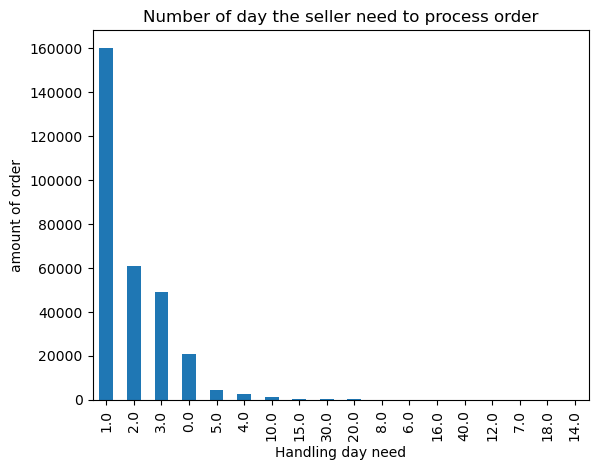

In [372]:
# fig= px.bar(df_ebay, x= 'declared_handling_days', y= df_ebay['declared_handling_days'].values)
# fig.show()

df_ebay['declared_handling_days'].value_counts().plot(kind='bar')
plt.xlabel('Handling day need')
plt.ylabel('amount of order')
plt.title('Number of day the seller need to process order')
plt.show()


Most of the order has the estimate processing day very fast, about 0 day to 3 days need.

The item price with the handling day need.

In [373]:
fig= px.scatter(df_ebay, x= 'declared_handling_days', y= df_ebay['item_price'])
# fig= px.bar(df_ebay, x= 'shipment_method_id', y= 'declared_handling_days')
fig.show()

## Feature Engineering

Let check out the distributions, we are going to check over all the column in the dataset

In [374]:
# Re call the dataset 
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    300000 non-null  object        
 1   seller_id                  300000 non-null  int64         
 2   declared_handling_days     300000 non-null  float64       
 3   acceptance_scan_timestamp  300000 non-null  object        
 4   shipment_method_id         300000 non-null  int64         
 5   shipping_fee               300000 non-null  float64       
 6   carrier_min_estimate       300000 non-null  float64       
 7   carrier_max_estimate       300000 non-null  float64       
 8   item_zip                   300000 non-null  object        
 9   buyer_zip                  300000 non-null  object        
 10  category_id                300000 non-null  int64         
 11  item_price                 300000 non-null  float64 

#### b2c_c2c

In [375]:
#checking the b2c_c2c column
df_ebay['b2c_c2c'].value_counts()

B2C    212946
C2C     87054
Name: b2c_c2c, dtype: int64

Convert `b2c_c2c` column to binary

In [376]:
df_ebay['b2c_c2c']= np.where(df_ebay['b2c_c2c']=='B2C', 1, 0)

In [377]:
#Santity check
df_ebay.head()

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
0        1      25454                     3.0                2019-03-27   
1        0    6727381                     2.0                2018-06-03   
2        1      18507                     1.0                2019-01-08   
3        1       4677                     1.0                2018-12-18   
4        1       4677                     1.0                2018-07-28   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0           0.0                   3.0   
1                   0           3.0                   3.0   
2                   0           4.5                   3.0   
3                   0           0.0                   3.0   
4                   0           0.0                   3.0   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                   5.0       97219     49040           13       27.95   
1                   5.0  11415-3528     62521            0       20.50   
2                   5.0       27292     53010            1       19.90   
3                   5.0       90703     80022            1       35.50   
4                   5.0       90703     55070            1       25.00   

   quantity payment_datetime delivery_date  weight  weight_units  \
0         1       2019-03-24    2019-03-29       5             1   
1         1       2018-06-02    2018-06-05       0             1   
2         1       2019-01-06    2019-01-10       9             1   
3         1       2018-12-17    2018-12-21       8             1   
4         1       2018-07-27    2018-07-30       3             1   

             package_size  record_number  
0                  LETTER              1  
1  PACKAGE_THICK_ENVELOPE              2  
2  PACKAGE_THICK_ENVELOPE              3  
3  PACKAGE_THICK_ENVELOPE              4  
4  PACKAGE_THICK_ENVELOPE              5

#### Weigth and Weight_units

There is 2 `weight_units` is 1 and 2. Let say 1 - 'lbs' and 2 - 'kg'. We are going to convert all the weight units to lb.

In [378]:
#check the record has weigtht unit =2 to able to compare
df_ebay[df_ebay['weight_units']==2].head()

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
115821        1      46815                     1.0                2018-01-29   

        shipment_method_id  shipping_fee  carrier_min_estimate  \
115821                   0           0.0                   3.0   

        carrier_max_estimate item_zip buyer_zip  category_id  item_price  \
115821                   5.0    35503     30605            1        6.89   

        quantity payment_datetime delivery_date  weight  weight_units  \
115821         2       2018-01-29    2018-01-31     113             2   

          package_size  record_number  
115821  LARGE_ENVELOPE         115822

In [379]:
#Convert them in to lb.
df_ebay['weight'] = np.where(df_ebay['weight_units']==1, df_ebay['weight'], df_ebay['weight']*2.20462 )

check the record with `weight_units`=2 to see if the `weight` column is changed

In [380]:
df_ebay[df_ebay['weight_units']==2]

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
115821        1      46815                     1.0                2018-01-29   

        shipment_method_id  shipping_fee  carrier_min_estimate  \
115821                   0           0.0                   3.0   

        carrier_max_estimate item_zip buyer_zip  category_id  item_price  \
115821                   5.0    35503     30605            1        6.89   

        quantity payment_datetime delivery_date     weight  weight_units  \
115821         2       2018-01-29    2018-01-31  249.12206             2   

          package_size  record_number  
115821  LARGE_ENVELOPE         115822

All the `weight` with the `weight_units` = 2 are convert to the **lb** unit. So now we do not need to keep the weight column since all the weight is in the **lb**. Therefore, we are going to drop the `weight_units` column.

In [381]:
df_ebay.drop(columns='weight_units', axis=1, inplace=True)

In [382]:
#check it
df_ebay.head()

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
0        1      25454                     3.0                2019-03-27   
1        0    6727381                     2.0                2018-06-03   
2        1      18507                     1.0                2019-01-08   
3        1       4677                     1.0                2018-12-18   
4        1       4677                     1.0                2018-07-28   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0           0.0                   3.0   
1                   0           3.0                   3.0   
2                   0           4.5                   3.0   
3                   0           0.0                   3.0   
4                   0           0.0                   3.0   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                   5.0       97219     49040           13       27.95   
1                   5.0  11415-3528     62521            0       20.50   
2                   5.0       27292     53010            1       19.90   
3                   5.0       90703     80022            1       35.50   
4                   5.0       90703     55070            1       25.00   

   quantity payment_datetime delivery_date  weight            package_size  \
0         1       2019-03-24    2019-03-29     5.0                  LETTER   
1         1       2018-06-02    2018-06-05     0.0  PACKAGE_THICK_ENVELOPE   
2         1       2019-01-06    2019-01-10     9.0  PACKAGE_THICK_ENVELOPE   
3         1       2018-12-17    2018-12-21     8.0  PACKAGE_THICK_ENVELOPE   
4         1       2018-07-27    2018-07-30     3.0  PACKAGE_THICK_ENVELOPE   

   record_number  
0              1  
1              2  
2              3  
3              4  
4              5

The `weigth_units` column has been dropped. 

#### Package_size

Check the `package_size` column

In [383]:
#How many type of package 
df_ebay['package_size'].value_counts()

PACKAGE_THICK_ENVELOPE    253394
NONE                       20735
LETTER                     18301
LARGE_ENVELOPE              4183
LARGE_PACKAGE               3387
Name: package_size, dtype: int64

There are 5 type of package. so we can use the ordinal encoding to tranfer this column to numeric instead of category column. `'NONE': 0, 'LETTER': 1, 'LARGE_ENVELOPE': 2, 'LARGE_PACKAGE': 3, 'PACKAGE_THICK_ENVELOPE': 4`

In [384]:
oe_package= OrdinalEncoder(categories=[['NONE', 'LETTER', 'LARGE_ENVELOPE',
                                         'LARGE_PACKAGE', 'PACKAGE_THICK_ENVELOPE']])
df_ebay['package_size']=oe_package.fit_transform(pd.DataFrame(df_ebay['package_size'])) 

In [385]:
df_ebay['package_size'].value_counts()

4.0    253394
0.0     20735
1.0     18301
2.0      4183
3.0      3387
Name: package_size, dtype: int64

In [386]:
# Check it
df_ebay.head()

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
0        1      25454                     3.0                2019-03-27   
1        0    6727381                     2.0                2018-06-03   
2        1      18507                     1.0                2019-01-08   
3        1       4677                     1.0                2018-12-18   
4        1       4677                     1.0                2018-07-28   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0           0.0                   3.0   
1                   0           3.0                   3.0   
2                   0           4.5                   3.0   
3                   0           0.0                   3.0   
4                   0           0.0                   3.0   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                   5.0       97219     49040           13       27.95   
1                   5.0  11415-3528     62521            0       20.50   
2                   5.0       27292     53010            1       19.90   
3                   5.0       90703     80022            1       35.50   
4                   5.0       90703     55070            1       25.00   

   quantity payment_datetime delivery_date  weight  package_size  \
0         1       2019-03-24    2019-03-29     5.0           1.0   
1         1       2018-06-02    2018-06-05     0.0           4.0   
2         1       2019-01-06    2019-01-10     9.0           4.0   
3         1       2018-12-17    2018-12-21     8.0           4.0   
4         1       2018-07-27    2018-07-30     3.0           4.0   

   record_number  
0              1  
1              2  
2              3  
3              4  
4              5

#### Item_zip and buyer_zip

Next we are going to calculate the distance between the buyer and the seller buy using there zip code in the `item_zip` and `buyer_zip` columns.

In [387]:
#check any null value in these columns.
print(df_ebay['item_zip'].isna().any())
print(df_ebay['buyer_zip'].isna().any())

False
False


In [388]:
item_zip= df_ebay['item_zip']
buyer_zip= df_ebay['buyer_zip']

In [389]:
import mpu
from uszipcode import SearchEngine
# from pathlib_mate.pathlib2 import Path
# import uszipcode.search as search

def get_distance(item_zip, buyer_zip):
    """
    We are going to use the package mpu and uszipcode to imporve the speed of calculating the distance between buyer and seller by using zip code. 
    These 2 packages make the speed of calculation much faster compare with using the geopy package
    """
    if item_zip is not None and buyer_zip is not None:
        search_location = SearchEngine()
        item_location = search_location.by_zipcode(item_zip[0:5])
        buyer_location =search_location.by_zipcode(buyer_zip[0:5])
        if item_location is None or buyer_location is None:
            return None
        else:
            lat1 =item_location.lat
            long1 =item_location.lng
            lat2 =buyer_location.lat
            long2 =buyer_location.lng
            if lat1 is None or lat2 is None or long1 is None or long2 is None:
                return None
            return mpu.haversine_distance((lat1,long1),(lat2,long2)) 
    else:
        return None


def add_zip_distance_column(item_zip, buyer_zip):
    item_zip_str = item_zip.apply(lambda x: str(x))
    buyer_zip_str = buyer_zip.apply(lambda x: str(x))

    zips = pd.concat([item_zip_str, buyer_zip_str], axis=1)

    zips['distance'] = zips.apply(lambda x: get_distance(x.item_zip, x.buyer_zip), axis=1)
    
    return zips['distance']

In [390]:
distance = add_zip_distance_column(item_zip, buyer_zip)

Add the value of the distance in to the data frame

In [391]:
df_ebay['distance']= distance
df_ebay.head(10)

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
0        1      25454                     3.0                2019-03-27   
1        0    6727381                     2.0                2018-06-03   
2        1      18507                     1.0                2019-01-08   
3        1       4677                     1.0                2018-12-18   
4        1       4677                     1.0                2018-07-28   
5        1      10514                     1.0                2019-04-20   
6        1        104                     1.0                2019-02-09   
7        1     340356                     1.0                2018-04-24   
8        1     113915                     5.0                2019-10-12   
9        1     130301                     1.0                2019-08-10   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0          0.00                   3.0   
1                   0          3.00                   3.0   
2                   0          4.50                   3.0   
3                   0          0.00                   3.0   
4                   0          0.00                   3.0   
5                   0          0.00                   3.0   
6                   0          0.00                   3.0   
7                   0          2.95                   3.0   
8                   3          0.00                   2.0   
9                   1          0.00                   2.0   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                   5.0       97219     49040           13       27.95   
1                   5.0  11415-3528     62521            0       20.50   
2                   5.0       27292     53010            1       19.90   
3                   5.0       90703     80022            1       35.50   
4                   5.0       90703     55070            1       25.00   
5                   5.0       43215     77063            3       10.39   
6                   5.0       91304     60565           11        5.70   
7                   5.0       49735     29379            1        6.00   
8                   8.0       43606     32958           18        5.55   
9                   5.0       35117     84776           13       59.98   

   quantity payment_datetime delivery_date  weight  package_size  \
0         1       2019-03-24    2019-03-29     5.0           1.0   
1         1       2018-06-02    2018-06-05     0.0           4.0   
2         1       2019-01-06    2019-01-10     9.0           4.0   
3         1       2018-12-17    2018-12-21     8.0           4.0   
4         1       2018-07-27    2018-07-30     3.0           4.0   
5         1       2019-04-19    2019-04-22     1.0           4.0   
6         1       2019-02-09    2019-02-11     0.0           4.0   
7         1       2018-04-23    2018-04-25     1.0           4.0   
8         1       2019-10-11    2019-10-15     0.0           0.0   
9         1       2019-08-09    2019-08-12   112.0           4.0   

   record_number     distance  
0              1  3001.839179  
1              2  1282.908017  
2              3  1104.444168  
3              4  1353.390003  
4              5  2456.330752  
5              6  1608.340906  
6              7  2781.527939  
7              8  1174.270246  
8              9  1568.867800  
9             10  2311.015450

Take a look at th data  after change

In [392]:
df_ebay.head(10)

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
0        1      25454                     3.0                2019-03-27   
1        0    6727381                     2.0                2018-06-03   
2        1      18507                     1.0                2019-01-08   
3        1       4677                     1.0                2018-12-18   
4        1       4677                     1.0                2018-07-28   
5        1      10514                     1.0                2019-04-20   
6        1        104                     1.0                2019-02-09   
7        1     340356                     1.0                2018-04-24   
8        1     113915                     5.0                2019-10-12   
9        1     130301                     1.0                2019-08-10   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0          0.00                   3.0   
1                   0          3.00                   3.0   
2                   0          4.50                   3.0   
3                   0          0.00                   3.0   
4                   0          0.00                   3.0   
5                   0          0.00                   3.0   
6                   0          0.00                   3.0   
7                   0          2.95                   3.0   
8                   3          0.00                   2.0   
9                   1          0.00                   2.0   

   carrier_max_estimate    item_zip buyer_zip  category_id  item_price  \
0                   5.0       97219     49040           13       27.95   
1                   5.0  11415-3528     62521            0       20.50   
2                   5.0       27292     53010            1       19.90   
3                   5.0       90703     80022            1       35.50   
4                   5.0       90703     55070            1       25.00   
5                   5.0       43215     77063            3       10.39   
6                   5.0       91304     60565           11        5.70   
7                   5.0       49735     29379            1        6.00   
8                   8.0       43606     32958           18        5.55   
9                   5.0       35117     84776           13       59.98   

   quantity payment_datetime delivery_date  weight  package_size  \
0         1       2019-03-24    2019-03-29     5.0           1.0   
1         1       2018-06-02    2018-06-05     0.0           4.0   
2         1       2019-01-06    2019-01-10     9.0           4.0   
3         1       2018-12-17    2018-12-21     8.0           4.0   
4         1       2018-07-27    2018-07-30     3.0           4.0   
5         1       2019-04-19    2019-04-22     1.0           4.0   
6         1       2019-02-09    2019-02-11     0.0           4.0   
7         1       2018-04-23    2018-04-25     1.0           4.0   
8         1       2019-10-11    2019-10-15     0.0           0.0   
9         1       2019-08-09    2019-08-12   112.0           4.0   

   record_number     distance  
0              1  3001.839179  
1              2  1282.908017  
2              3  1104.444168  
3              4  1353.390003  
4              5  2456.330752  
5              6  1608.340906  
6              7  2781.527939  
7              8  1174.270246  
8              9  1568.867800  
9             10  2311.015450

#### Creater new column using `acceptance_scan_timestamp`, `payment_datetime` and `delivery_date`

Now we see that most of the column is in the good shape. But the model cannot run with the datetime type of variable. So we are going to create some 2 new column base on the datetime column. 
-   **handling_date** = `acceptance_scan_timestamp` - `payment_dateime`
-   **shipping_date** = `delivery_date` - `acceptance_scan_timestamp`
-   **total_time** = `delivery_date` - `payment_dateime`

First, we convert all 3 columns to datetime value

In [393]:
df_ebay['acceptance_scan_timestamp']= pd.to_datetime(df_ebay['acceptance_scan_timestamp'])
df_ebay['payment_datetime']= pd.to_datetime(df_ebay['payment_datetime'])
df_ebay['delivery_date']= pd.to_datetime(df_ebay['delivery_date'])

In [394]:
#calulate date function
def date_calculate(day1, day2):
    number_of_day=[]
    date_list= day2- day1
    for day in date_list:
        date= day.days
        number_of_day.append(date)
    return number_of_day


In [395]:
#calulate handling_date
handling_date= date_calculate(df_ebay['payment_datetime'], df_ebay['acceptance_scan_timestamp'])

#calculate shipping_date
shipping_date= date_calculate(df_ebay['acceptance_scan_timestamp'], df_ebay['delivery_date'])

#calculate totlatime

total_time= date_calculate(df_ebay['payment_datetime'], df_ebay['delivery_date'])


Create `handling_date` and `shipping_date` as new columns in data frame and add the value for it

In [396]:
df_ebay['handling_date']= handling_date
df_ebay['shipping_date']= shipping_date
df_ebay['total_time']= total_time

In [397]:
#check data frame
df_ebay.sample(10)

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
269064        1          2                     1.0                2018-01-22   
182871        1      25680                     1.0                2019-04-07   
289256        1       8104                     1.0                2019-10-03   
282122        1     154992                     2.0                2018-02-22   
262915        1         13                     1.0                2018-04-11   
118757        1     159850                     2.0                2018-01-11   
113605        1        543                     1.0                2019-07-09   
31436         1      11202                     1.0                2019-03-05   
156510        1         86                     1.0                2018-03-07   
138793        1      47282                     1.0                2019-07-08   

        shipment_method_id  shipping_fee  carrier_min_estimate  \
269064                   3          0.00                   2.0   
182871                   0          0.00                   3.0   
289256                   0          0.00                   3.0   
282122                   5          6.90                   2.0   
262915                   2          0.00                   2.0   
118757                   1          0.00                   2.0   
113605                   0          0.00                   3.0   
31436                    3          0.00                   2.0   
156510                   0          0.00                   3.0   
138793                   0          4.06                   3.0   

        carrier_max_estimate    item_zip buyer_zip  ...  quantity  \
269064                   8.0  33323-2845     11941  ...         1   
182871                   5.0       30117     02128  ...         1   
289256                   5.0       10001     38506  ...         1   
282122                   5.0       29926     29681  ...         1   
262915                   9.0       45014     15671  ...         1   
118757                   5.0       46818     74050  ...         1   
113605                   5.0       08561     17814  ...         1   
31436                    8.0       46989     12065  ...         1   
156510                   5.0       07657     98640  ...         1   
138793                   5.0       23464     92508  ...         1   

        payment_datetime  delivery_date weight package_size  record_number  \
269064        2018-01-20     2018-01-25    0.0          0.0         269065   
182871        2019-04-06     2019-04-08    4.0          1.0         182872   
289256        2019-10-02     2019-10-05    0.0          4.0         289257   
282122        2018-02-22     2018-02-23   32.0          4.0         282123   
262915        2018-04-10     2018-04-14    0.0          0.0         262916   
118757        2018-01-10     2018-01-12   48.0          4.0         118758   
113605        2019-07-08     2019-07-10    0.0          1.0         113606   
31436         2019-03-03     2019-03-08    0.0          4.0          31437   
156510        2018-03-06     2018-03-10    4.0          4.0         156511   
138793        2019-07-08     2019-07-10    2.0          4.0         138794   

           distance  handling_date  shipping_date  total_time  
269064  1775.792029              2              3           5  
182871  1568.706533              1              1           2  
289256  1115.566436              1              2           3  
282122   315.251627              0              1           1  
262915   460.051155              1              3           4  
118757  1095.321338              1              1           2  
113605   184.212419              1              1           2  
31436   1007.564026              2              3           5  
156510  4004.134716              1              3           4  
138793  3715.893126              0              2           2  

[10 rows x 22 columns]

#### Seprate the payment_datetime to year, mon, date column

In [398]:
df_ebay['pay_year']= df_ebay['payment_datetime'].dt.year
df_ebay['pay_month']= df_ebay['payment_datetime'].dt.month
df_ebay['pay_date']= df_ebay['payment_datetime'].dt.day


In [399]:
#Check table
df_ebay.head()

b2c_c2c  seller_id  declared_handling_days acceptance_scan_timestamp  \
0        1      25454                     3.0                2019-03-27   
1        0    6727381                     2.0                2018-06-03   
2        1      18507                     1.0                2019-01-08   
3        1       4677                     1.0                2018-12-18   
4        1       4677                     1.0                2018-07-28   

   shipment_method_id  shipping_fee  carrier_min_estimate  \
0                   0           0.0                   3.0   
1                   0           3.0                   3.0   
2                   0           4.5                   3.0   
3                   0           0.0                   3.0   
4                   0           0.0                   3.0   

   carrier_max_estimate    item_zip buyer_zip  ...  weight  package_size  \
0                   5.0       97219     49040  ...     5.0           1.0   
1                   5.0  11415-3528     62521  ...     0.0           4.0   
2                   5.0       27292     53010  ...     9.0           4.0   
3                   5.0       90703     80022  ...     8.0           4.0   
4                   5.0       90703     55070  ...     3.0           4.0   

   record_number     distance handling_date  shipping_date  total_time  \
0              1  3001.839179             3              2           5   
1              2  1282.908017             1              2           3   
2              3  1104.444168             2              2           4   
3              4  1353.390003             1              3           4   
4              5  2456.330752             1              2           3   

   pay_year  pay_month  pay_date  
0      2019          3        24  
1      2018          6         2  
2      2019          1         6  
3      2018         12        17  
4      2018          7        27  

[5 rows x 25 columns]

In [400]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    300000 non-null  int64         
 1   seller_id                  300000 non-null  int64         
 2   declared_handling_days     300000 non-null  float64       
 3   acceptance_scan_timestamp  300000 non-null  datetime64[ns]
 4   shipment_method_id         300000 non-null  int64         
 5   shipping_fee               300000 non-null  float64       
 6   carrier_min_estimate       300000 non-null  float64       
 7   carrier_max_estimate       300000 non-null  float64       
 8   item_zip                   300000 non-null  object        
 9   buyer_zip                  300000 non-null  object        
 10  category_id                300000 non-null  int64         
 11  item_price                 300000 non-null  float64 

In [401]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    300000 non-null  int64         
 1   seller_id                  300000 non-null  int64         
 2   declared_handling_days     300000 non-null  float64       
 3   acceptance_scan_timestamp  300000 non-null  datetime64[ns]
 4   shipment_method_id         300000 non-null  int64         
 5   shipping_fee               300000 non-null  float64       
 6   carrier_min_estimate       300000 non-null  float64       
 7   carrier_max_estimate       300000 non-null  float64       
 8   item_zip                   300000 non-null  object        
 9   buyer_zip                  300000 non-null  object        
 10  category_id                300000 non-null  int64         
 11  item_price                 300000 non-null  float64 

We are going to convert all the float column in to interger.

#### Recheck the table and save data in new csv file


In [402]:
df_ebay.shape


(300000, 25)

In [403]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    300000 non-null  int64         
 1   seller_id                  300000 non-null  int64         
 2   declared_handling_days     300000 non-null  float64       
 3   acceptance_scan_timestamp  300000 non-null  datetime64[ns]
 4   shipment_method_id         300000 non-null  int64         
 5   shipping_fee               300000 non-null  float64       
 6   carrier_min_estimate       300000 non-null  float64       
 7   carrier_max_estimate       300000 non-null  float64       
 8   item_zip                   300000 non-null  object        
 9   buyer_zip                  300000 non-null  object        
 10  category_id                300000 non-null  int64         
 11  item_price                 300000 non-null  float64 

In [404]:
#convert all float column to interger
df_ebay[['declared_handling_days', 'shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'item_price', 'weight', 'package_size', 'distance']] =\
      round(df_ebay[['declared_handling_days', 'shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'item_price', 'weight', 'package_size', 'distance']])

In [408]:
#check null again
df_ebay.isna().sum()

b2c_c2c                         0
seller_id                       0
declared_handling_days          0
acceptance_scan_timestamp       0
shipment_method_id              0
shipping_fee                    0
carrier_min_estimate            0
carrier_max_estimate            0
item_zip                        0
buyer_zip                       0
category_id                     0
item_price                      0
quantity                        0
payment_datetime                0
delivery_date                   0
weight                          0
package_size                    0
record_number                   0
distance                     3580
handling_date                   0
shipping_date                   0
total_time                      0
pay_year                        0
pay_month                       0
pay_date                        0
dtype: int64

We can see there are some value in the `distance` column is count as NA here. It could be because the Zipcode of the buyer or seller is not in the right format. We are going to drop all of row with NA in distance here since it is only 1257 rows over 95042 rows in total(around 1.3% the amount of data).

In [409]:
df_ebay= df_ebay.dropna()
df_ebay.isna().any().any()

False

In [410]:
df_ebay[['declared_handling_days', 'shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'item_price', 'weight', 'package_size', 'distance']] = \
df_ebay[['declared_handling_days', 'shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'item_price', 'weight', 'package_size', 'distance']] .astype(int)

In [411]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296420 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    296420 non-null  int64         
 1   seller_id                  296420 non-null  int64         
 2   declared_handling_days     296420 non-null  int64         
 3   acceptance_scan_timestamp  296420 non-null  datetime64[ns]
 4   shipment_method_id         296420 non-null  int64         
 5   shipping_fee               296420 non-null  int64         
 6   carrier_min_estimate       296420 non-null  int64         
 7   carrier_max_estimate       296420 non-null  int64         
 8   item_zip                   296420 non-null  object        
 9   buyer_zip                  296420 non-null  object        
 10  category_id                296420 non-null  int64         
 11  item_price                 296420 non-null  int64   

Now we export the data to the new CSV then later on we only work with clean data

In [412]:
df_ebay.to_csv('../data/cleaned/Ebay_cleaned.csv')